## **Dataset visualization and extraction from ESRF .h5 files**
- Version: 1.2 | Author: William Rigaut | Date: 26.11.2024
- Tested on MacOS Ventura 13.4.1 and Python 3.12.3

This code is designed to extract and visualize data from the European Synchrotron Radiation Facility (ESRF) at beamline BM02.

The module contains:
- Functions for extracting and visualizing data from the raw .h5data files
- Functions for extracting and visualizing data from the processed .h5 files
- Functions for saving data to .xy files

### **1. Import library and setup**

Firstly you can create a set of folders where your data will be stored and extracted. I recommand creating a main folder called `ESRF_data` containing three subfolder :
- `RAW_DATA` : Folder contaning the raw XRD data from the 2D camera
- `PROCESSED_DATA` : Folder containing the 1D spectra from integrated 2D images
- `SAVED_DATA` : Output folder containing .xy 1D spectra for each position

In [1]:
# Defining our paths with pathlib librairy
import pathlib as pl

main_folder = "ESRF_data"

raw_data_path = pl.Path(main_folder + '/' + "RAW_DATA")
processed_data_path = pl.Path(main_folder + '/' + "PROCESSED_DATA")
saved_data_path = pl.Path(main_folder + '/' "SAVED_DATA")

Then you can import the package `extract_esrf` to create these folders for you with :

In [2]:
# Making folders with create_folders() function from extract_esrf library
import packages.extract_esrf.extract_esrf as ee

ee.create_folders(main_folder,
                  raw_data_path, processed_data_path, saved_data_path)

Creating folder ESRF_data
Folder ESRF_data already exists.
Creating folder ESRF_data/RAW_DATA
Folder ESRF_data/RAW_DATA already exists.
Creating folder ESRF_data/PROCESSED_DATA
Folder ESRF_data/PROCESSED_DATA already exists.
Creating folder ESRF_data/SAVED_DATA
Folder ESRF_data/SAVED_DATA already exists.


Now that everything is setup you can download or import your raw data files from ESRF in the `RAW_DATA/` and `PROCESSED_DATA/` directories.

<span style="color: red;">Disclamer: You need to have both raw and processed data in order for the notebook to run properly.</span>

### **2. Data visualization and data extraction**

You can define the variable `foldername` to be the folder that contains the data you want to see, here is an example with NdFeB_7-17 dataset for the scan number 31:

In [13]:
foldername="NdCeFeB_2_5"
scan_number=30

Then you can call the function `extract_CdTe_data()` by specifiying both the foldername and the scan_number in argument. A few details about this function :
- The function actually returns an array containing the count on each pixel of the 2D camera. You can eventually save the content of image_2D if needed.
- You can disable the plotting by setting display to False with the code `ee.extract_CdTe_data(foldername, scan_number, display=False)`.
- If you are using a path for the raw data that is different from the one previously suggested you must pass in argument `raw_data_path=your_custom_path` so that the function knows where to look for the data.
- Note that in the 2D camera datasets, the first 26 scans are corresponding to z and theta alignements along the wafer, the first acquired position starts at `scan_number=27` and the last at `scan_number=315`.

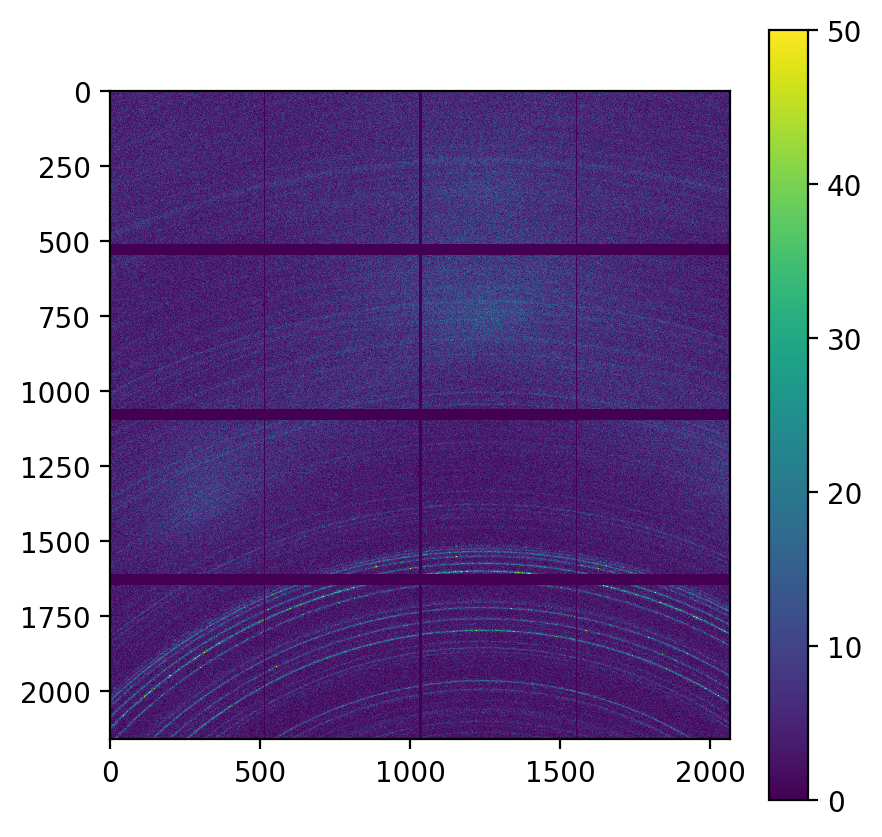

In [14]:
image_2D, metadata = ee.extract_CdTe_data(foldername, scan_number, display=True, output_metadata=True, raw_data_path=raw_data_path)

A very similar `function extract_integrated_data()` can be used to display the 1D integrated image data like this :

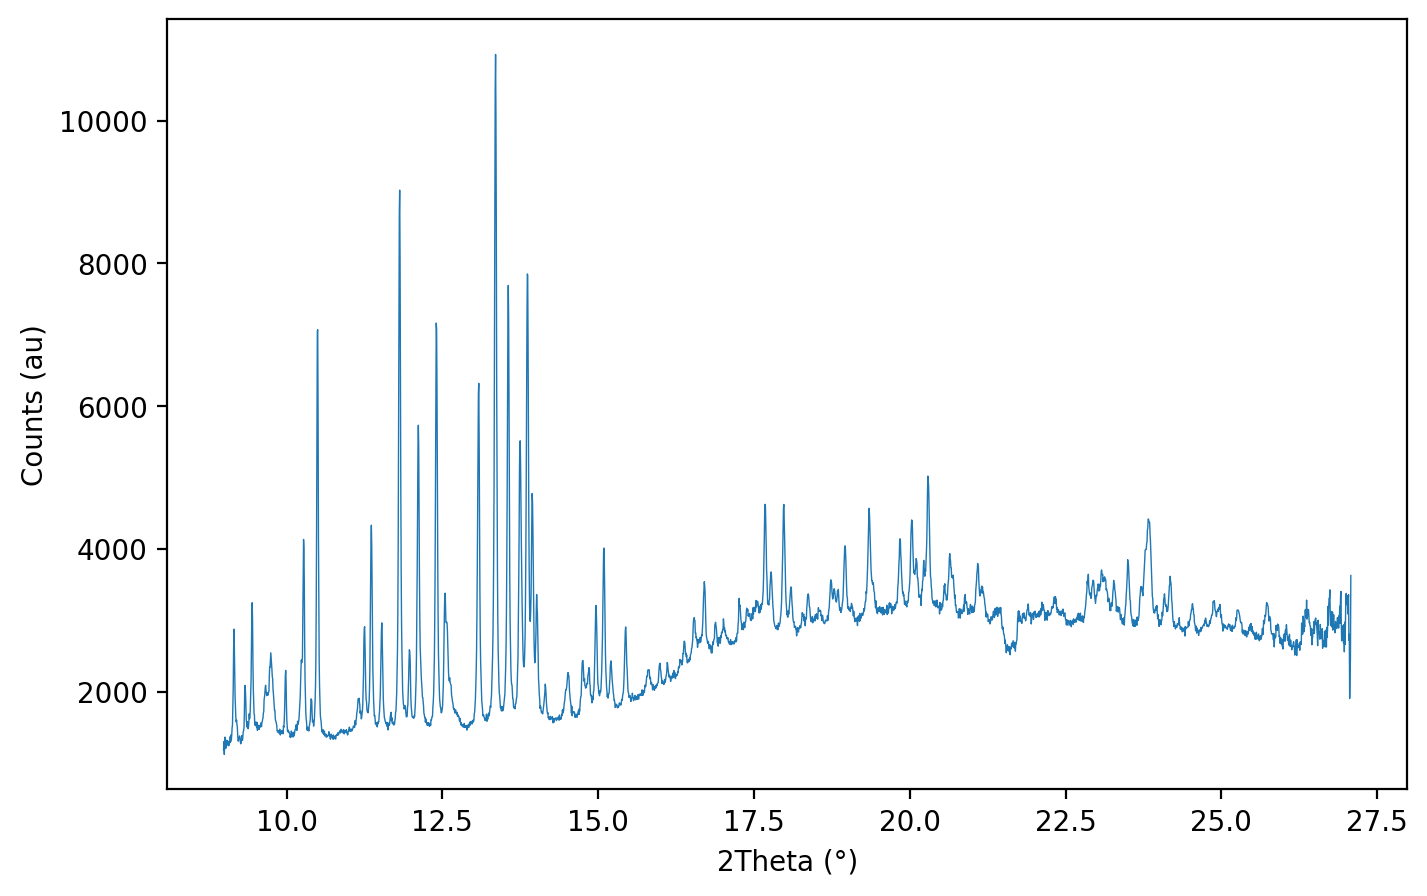

In [15]:
spectra_1D = ee.extract_integrated_data(foldername, scan_number, display=True, processed_data_path=processed_data_path)

You can then simply save the spectra using the function `save_integrated_data()` by passing first both the `foldername` and the `scan_number` as argument to generate a .xy file with a proper filename and then the `spectra_1D` you want to save. A few points :
- The x values saved are q values (in Å^-1) converted to 2θ angle by knowing the beam energy (25 keV).
- In the .h5 integrated data, counts at each angle are calculated by summing all the pixels intensities and normalized by the total number of pixels. In the library, the y values are arbitrary rescaled with a factor of 1000 to make it easier to read in Profex. The final unit for the counts should be counts/pixel*10^3.

In [6]:
ee.save_integrated_data(foldername, scan_number, spectra_1D, saved_data_path=saved_data_path)

If you want to save all the data from the dataset (excluding the calibration points) you can use instead `save_all_integrated()` by specifiying the `foldername` and all three paths `raw_data_path`, `processed_data_path`, `saved_data_path` to the function.

- The function will read all the scans from number 27 to 315 (25 to 274 for new scans), excluding the z and theta scans from calibration
- Metadata is copied from the raw data fils and written in the header of each .xy files.

In [16]:
ee.save_all_integrated(foldername,
    raw_data_path=raw_data_path,
    processed_data_path=processed_data_path,
    saved_data_path=saved_data_path,
    custom_range=range(25, 274))

100%|██████████| 249/249 [00:39<00:00,  6.34it/s]

All .xy spectrum saved in ESRF_data/SAVED_DATA/NdCeFeB_2_5 succesfully !


The same can be done with the images using the function `save_all_images()` where you need to pass in arguments the `foldername`, the `raw_data_path` and the `savec_data_path`.

- By default the function will only read measurement data which includes scans from number 27 to 315, but a `custom_range` can be specified using the `range(start, stop)` function.
- The image is saved using the FabIO library, and his saved as .img by default. Format can be changed with the `custom_format` parameter. A list of all FabIO compatible formats can be found here: http://www.silx.org/doc/fabio/latest/getting_started.html#list-of-file-formats-that-fabio-can-read-and-write

In [24]:
ee.save_all_images(
    foldername,
    raw_data_path=raw_data_path,
    saved_data_path=saved_data_path,
    custom_range=range(25, 274))

100%|██████████| 249/249 [01:11<00:00,  3.49it/s]

All CdTe data saved in ESRF_data/SAVED_DATA/NdCeFeB_2_5 succesfully !


You can then read the .img files using the `fabio` python module. Here is a advanced example using interactive sliders to display images:

In [10]:
import packages.extract_esrf.extract_esrf as ee

#folderpath_str = "ESRF_data/SAVED_DATA/YFeTa/YFeTa_3_2"
#folderpath_str = "ESRF_data/SAVED_DATA/CeCoX/CeCoZn_4_7"
#folderpath_str = "ESRF_data/SAVED_DATA/NdXFeB-triode/3161_NdFeB"
folderpath_str = "ESRF_data/SAVED_DATA//NdCeFeB_2_7"

ee.display_all_img(folderpath_str, index=117, scale="normal", aspect="1")

interactive(children=(IntSlider(value=117, description='index', max=273, min=25), IntSlider(value=0, descripti…

The follwing function `fuse_all_img()` will merge all of the images in a folder. You can customize the selection with the argument `idx_range`, default value is `range(25, 274)`:

In [ ]:
fused_img = ee.fuse_all_img(folderpath_str, idx_range=range(25, 274))


You can use this following code to plot the fused image :

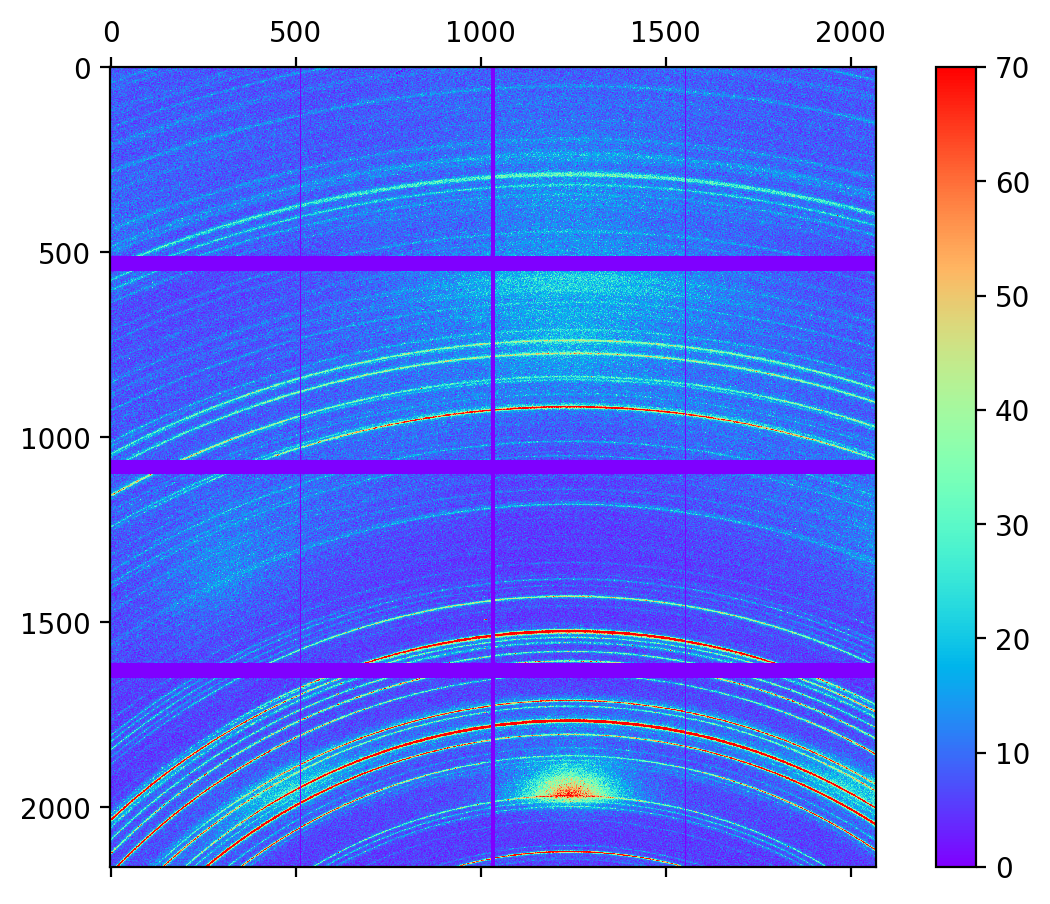

In [ ]:
import packages.extract_esrf.extract_esrf as ee

img_data_current = ee.plot_img("ESRF_data/SAVED_DATA/NdXFeB-triode/3161_NdFeB", index=193, plot=False)
img_data_current_2 = ee.plot_img("ESRF_data/SAVED_DATA/NdXFeB-triode/3161_NdFeB", index=200, plot=False)
ee.plot_img('_', '_', img_data=img_data_current_2, vmin=0, vmax=70, scale="normal", aspect="1")

- Script to redo the 1D integration while filtering the Al peaks. Please check the integration and make sure nothing went wrong during the process.

In [ ]:
# Imports
import packages.extract_esrf.extract_esrf as ee
import pathlib as pl
import os, fabio, pyFAI
from tqdm import tqdm
os.environ["PYOPENCL_COMPILER_OUTPUT"]="0"

# Defining our paths 
main_folder = "ESRF_data"
foldername = "NdCeFeB_2_5"
saved_data_path_filtered = f"./{main_folder}/SAVED_DATA/NdXFeB-magnetron/{foldername}/"
processed_data_path = pl.Path(f"{main_folder}/PROCESSED_DATA/")
ee.create_folders(main_folder, saved_data_path_filtered)

# Getting the poni file from ESRF to perform the integration
ai = pyFAI.load("/Users/williamrigaut/Desktop/Notebooks/Extract_ESRF_Data/ESRF_data/CONFIG/LaB6_25keV_20250501.poni")
# Filtering parameters, you can let that untouched
method = ["full", "csr", "cython"]
filter_name = "Median filtering"
percentile=(40,60)
pol=0.99

# Loop on all the images
for scan_number in tqdm(range(25, 274)):
    # Open the img file
    img = fabio.open(f"{saved_data_path_filtered}/{foldername}_{scan_number}.img").data
    # 1D integration using the median filter method
    plot1d = ai.medfilt1d_ng(img, 3000, method=method, percentile=percentile, polarization_factor=pol)
    # Getting the two theta and intensities
    tth_list = ee._convert_from_q_to_theta(plot1d[0]/10, wavelength=0.495937)
    intensity_list = plot1d[1]*1000
    data = (tth_list, intensity_list)

    # Save the 1D data in both .xy files and directly inside the hdf5 processed data file.
    ee.save_integrated_data(foldername, scan_number, data, save_metadata=True, raw_data_path="./ESRF_data/RAW_DATA/", saved_data_path=saved_data_path_filtered)
    ee.rewrite_to_hdf5(processed_data_path=processed_data_path, foldername=foldername, scan_number=scan_number, data=data, filter_name=filter_name)
    


---

In [ ]:
# Old try to identify outliers with Z score method directly on the image, but not finished and other method seems more reliable
from scipy import stats
import numpy as np

z_score = np.abs(stats.zscore(img_data_current))
z_score_2 = np.abs(stats.zscore(img_data_current_2))

z_score /= np.nanmax(z_score)
z_score_2 /= np.nanmax(z_score_2)

print(np.nanmax(z_score))
print(np.nanmax(z_score_2))

ee.plot_img('_', '_', img_data=z_score, vmin=0.0, vmax=1.0, scale="normal", aspect="1")
ee.plot_img('_', '_', img_data=z_score_2, vmin=0.0, vmax=1.0, scale="normal", aspect="1")


def create_disk(center_coordinates, radius=10):
    circle = []
    for i in range(center_coordinates[0]-radius, center_coordinates[0]+radius):
        for j in range(center_coordinates[1]-radius, center_coordinates[1]+radius):
            if (i-center_coordinates[0])**2+(j-center_coordinates[1])**2 <= radius**2:
                circle.append((i,j))
    return circle


def fill_mask(mask, circle, value):
    for i,j in circle:
        # Check if coordinate is in mask
        if i <= 0 or i > mask.shape[0] or j <= 0 or j > mask.shape[1]:
            continue
        mask[i][j] = value
    
    return mask


def create_mask(img_data_current, z_score, value=1, threshold=0.2):
    mask = np.zeros(img_data_current.shape)
    center_coordinate_list = []

    for i in range(img_data_current.shape[0]):
        for j in range(img_data_current.shape[1]):
            if z_score[i][j] > threshold:
                center_coordinates = (i, j)
                circle = create_disk(center_coordinates)
                mask = fill_mask(mask, circle, value=value)
                center_coordinate_list.append(center_coordinates)

    return mask, center_coordinate_list


ee.plot_img('_', '_', img_data=img_data_current_2, vmin=0.0, vmax=50.0, scale="normal", aspect="1")
mask, center_coordinate_list = create_mask(img_data_current_2, z_score_2, value=10, threshold=0.5)
ee.plot_img('_', '_', img_data=mask, vmin=0.0, vmax=10, scale="normal", aspect="1")

In [ ]:
import xrayutilities as xu


sample_rotation = ['y-','x+','z-']# omega, chi @ eta = 0, phi @ chi = 0
detector_rotation = ['y-','z-'] # 2th, 2thChi
beam_direction = [1,0,0]

qconv = xu.experiment.QConversion(sample_rotation, detector_rotation, beam_direction)
print(qconv)

# ENERGY
wavelength = 0.495937
energy = 12398.4/wavelength

# FIRST DIRECTION TO DEFINE WHICH Q COMPONENT ALONG XRAYS
# [xdir1, ydir1, zdir1] orientation along beam direction
all_zero_Orientation_In_Beam_Direction = [1,0,0]

# SECOND DIRECTION TO DEFINE WHICH Q COMPONENT PERP AND IN SCATTERING PLANE
# FOR INSTANCE : along surface normal for a film
# [xnormal,ynormal,znormal] orientation perp, in scattering plane
all_zero_Orientation_Perp_In_Scattering_Plane = [0,0,1]

# call HXRD method 
hxrd=xu.HXRD(all_zero_Orientation_In_Beam_Direction,
             all_zero_Orientation_Perp_In_Scattering_Plane,
             en=energy,
             qconv=qconv)
print(hxrd)

QConversion geometry 
---------------------------
sample geometry(3): y-x+z-
detector geometry(2): y-z-
primary beam direction: ( 1.00  0.00  0.00) 

scattering plane normal: (0.000000 -1.000000 0.000000)
inplane azimuth: (1.000000 0.000000 0.000000)
second refercence direction: (0.000000 0.000000 1.000000)
energy: 24999.949590 (eV)
wavelength: 0.495938 (angstrom)
QConversion geometry 
---------------------------
sample geometry(3): y-x+z-
detector geometry(2): y-z-
primary beam direction: ( 1.00  0.00  0.00) 



In [ ]:
omega, tth, tthchi = 45, 90, 0
print('Q is ', hxrd.Ang2Q(omega, chi, phi, tth, tthchi))
# should be along Qz

Q is  (np.float64(0.0), np.float64(0.0), np.float64(17.917097645265336))


In [ ]:
import pyFAI

# here we enter specifics about the set-up
# nb of pixels hor, vert and size in [m]
Npx_h, Npx_v = 2068, 2162
pix_width_h  = 7.5e-05
pix_width_v  = 7.5e-05

# get center and distance from poni file
ai = pyFAI.load("/Users/williamrigaut/Desktop/Notebooks/Extract_ESRF_Data/ESRF_data/CONFIG/LaB6_25keV_20250501.poni")
distance     = ai.dist
c1           = ai.get_poni2()/pix_width_h
c2           = ai.get_poni1()/pix_width_v

print('Center is ', c1, c2)
print('Distance is ', distance)

#### DATA SAMPLING
nav  = [1,1] #For data reduction in the two directions
xmin, xmax, ymin, ymax = 0, Npx_h, 0, Npx_v
# ROI ?
roi = [xmin, xmax, ymin, ymax]

Center is  1214.2195044428963 2035.8118402416567
Distance is  0.5479069521977671


In [ ]:
# init_area() calculates the position in space of each and every pixels
hxrd.Ang2Q.init_area('y-', 'z-', 
                    cch1=c1, cch2=c2,
                    Nch1 = Npx_h, Nch2 = Npx_v, 
                    pwidth1=pix_width_h, pwidth2=pix_width_v,
                    distance=distance,
                    Nav=nav,
                    roi=roi)

In [ ]:
# x along x-rays, z vertical, y right referential
omega, chi, phi, tth, tthchi = 0, 0, 0, 0, 0
qx, qy, qz = hxrd.Ang2Q.area(omega,chi,phi,tth,tthchi) # omega, chi, phi, tth, tthchi

In [ ]:
# retrieving the size of the detector
print(qx.shape, qy.shape, qz.shape)
# some q values, a random pixel [12,189]
print(qx[0,0], qy[0,0], qz[0,0])

(2068, 2162) (2068, 2162) (2068, 2162)
-0.6184985510957225 2.002938585019492 3.3582116509736215


1.9803862014989626
6.0002961388005565
4.974394645509082


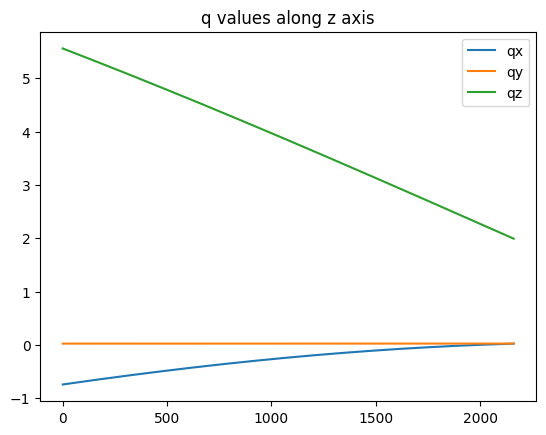

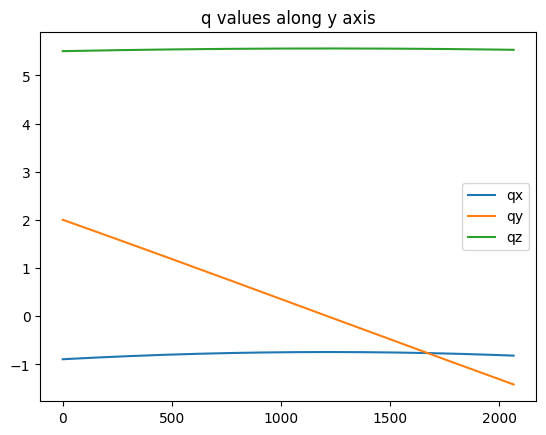

In [ ]:
#instrument/positioners_end/th: 5.177382010956184 (omega)
#instrument/positioners_end/tth: 9.99967981196768 (tth)

omega, chi, phi, tth, tthchi = 5.1774, 0, 0, 9.9997, 0
qx, qy, qz = hxrd.Ang2Q.area(omega, chi, phi, tth, tthchi)

def calculate_q_norm(qx, qy, qz):
    q = np.sqrt(qx**2 + qy**2 + qz**2)
    return q

# checking min and max q of the 2D image
print(calculate_q_norm(np.abs(qx).min(), np.abs(qy).min(), np.abs(qz).min()))
print(calculate_q_norm(np.abs(qx).max(), np.abs(qy).max(), np.abs(qz).max()))

print(calculate_q_norm(qx[2000,500], qy[2000,500], qz[2000,500]))

plt.title("q values along z axis") 
plt.plot(qx[1200,:], label="qx")
plt.plot(qy[1200,:], label="qy")
plt.plot(qz[1200,:], label="qz")
plt.legend()
plt.show()

plt.title("q values along y axis") 
plt.plot(qx[:,0], label="qx")
plt.plot(qy[:,0], label="qy")
plt.plot(qz[:,0], label="qz")
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

Al_cubic = xu.materials.Al
print(Al_cubic)

tt = np.arange(7.5, 27.5, 0.01)

Al_powder = xu.simpack.Powder(Al_cubic, 1)
pm = xu.simpack.PowderModel(Al_powder, en=energy, I0=100)

inte = pm.simulate(tt)

Crystal: Al
Lattice:
225 cubic Fm-3m: a = 4.0496, b = 4.0496 c= 4.0496
alpha = 90.000, beta = 90.000, gamma = 90.000
Lattice base:
0: Al (13) 4a  occ=1.000 b=0.000
Reflection conditions:
 general: hkl: h+k,h+l,k+l=2n, 0kl: k,l=2n, hhl: h+l=2n, h00: h=2n
4a      : None



h, k, l, theta, q, multiplicity
(1, 1, 1) 12.18 2.69 1
(0, 0, 2) 14.07 3.1 3
(0, 2, 0) 14.07 3.1 2
(2, 0, 0) 14.07 3.1 1
(0, 2, 2) 19.95 4.39 1
(2, 0, 2) 19.95 4.39 1
(2, 2, 0) 19.95 4.39 1
(1, 1, 3) 23.44 5.15 1
(1, 3, 1) 23.44 5.15 1
(3, 1, 1) 23.44 5.15 1
(2, 2, 2) 24.49 5.37 1


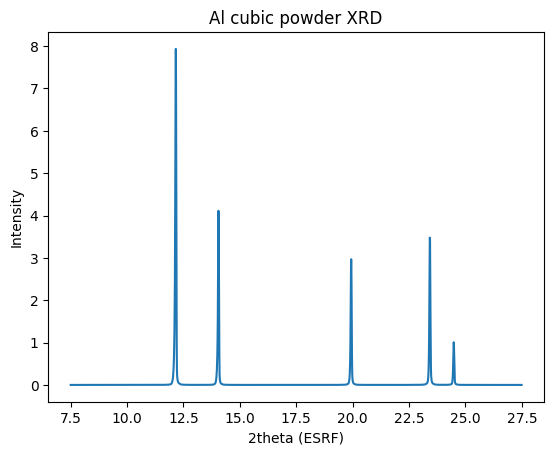

In [ ]:
wavelength = 0.495937

def calculate_d_hkl_cubic(h, k, l, material):
    if h == 0 and k == 0 and l == 0:
        raise ValueError('hkl cannot be 0,0,0')
    return np.sqrt(material.a**2/(h**2 + k**2 + l**2))

def calculate_theta_from_q(q, wavelength):
    return 2*np.arcsin(q * wavelength / (4 * np.pi))*180/np.pi

def calculate_q(d):
    return 2*np.pi/d

def display_q_and_tth(reflections, forbidden_q, q_min=1.98, q_max=6.0):
    d_hkl = calculate_d_hkl_cubic(h, k, l, Al_cubic)
    q = calculate_q(d_hkl)
    theta = calculate_theta_from_q(q, wavelength)

    if q >= q_min and q <= q_max:
        if round(q, 2) in forbidden_q:
            return reflections
        if (h,k,l) not in reflections:
            reflections[(h,k,l)] = {'theta': round(theta, 2), 'q': round(q, 2), "multiplicity": 1}
        else:
            reflections[(h,k,l)]['multiplicity'] += 1
    
    return reflections


reflections = {}
forbidden_q = [3.47, 4.65, 5.59]

for h in range(0, 6):
    for k in range(0, 6):
        for l in range(0, 6):
            if h+k+l == 0:
                continue
            if ((h+k)%2 == 0 and (k+l)%2 == 0 and (l+h)%2 == 0) and h*k*l != 0:
                reflections = display_q_and_tth(reflections, forbidden_q)
            if h == 0 and k%2 == 0 and l%2 == 0:
                reflections = display_q_and_tth(reflections, forbidden_q)
            if h==k and h+l%2 == 0:
                reflections = display_q_and_tth(reflections, forbidden_q)
            if h%2 == 0 and k*l ==0:
                reflections = display_q_and_tth(reflections, forbidden_q)

reflections = dict(sorted(reflections.items(), key=lambda item: item[1]["q"]))


print("h, k, l, theta, q, multiplicity")
for line in reflections:
    print(line, reflections[line]["theta"], reflections[line]["q"], reflections[line]["multiplicity"]) 

# Intensity vs two theta
plt.plot(tt, inte)
plt.title("Al cubic powder XRD")
plt.xlabel("2theta (ESRF)")
plt.ylabel("Intensity")
plt.show()

In [ ]:
delta_q = 0.11
offset_q = 0.15 

count = 0
matching_pos_list = np.zeros(img_data_current_2.shape)

print("Pixels detectées", len(center_coordinate_list))

for x, y in center_coordinate_list:
    if not (x < qx.shape[0] and y < qx.shape[1]):
        continue
    q = calculate_q_norm(qx[y, x], qy[y, x], qz[y, x])
    
    for line in reflections:
        if reflections[line]["q"] < (q+offset_q)+delta_q and reflections[line]["q"] > (q+offset_q)-delta_q:
            count += 1
            print("Found q:", q, "with hkl:", line, " matching with Al_cubic, q=",qx[y, x], qy[y, x], qz[y, x])
            print(x,y)
            matching_pos_list[x, y] = 1
            continue
            

print("Pixels appartenant à la phase Al_cubic", count)

Pixels detectées 237
Found q: 5.074322659967936 with hkl: (1, 1, 3)  matching with Al_cubic, q= -0.5727334369707346 -1.0082239193983698 4.940061881797914
393 1812
Found q: 5.074322659967936 with hkl: (1, 3, 1)  matching with Al_cubic, q= -0.5727334369707346 -1.0082239193983698 4.940061881797914
393 1812
Found q: 5.074322659967936 with hkl: (3, 1, 1)  matching with Al_cubic, q= -0.5727334369707346 -1.0082239193983698 4.940061881797914
393 1812
Found q: 5.074631139620134 with hkl: (1, 1, 3)  matching with Al_cubic, q= -0.5728611471538374 -1.0098998237273848 4.940021624984989
393 1813
Found q: 5.074631139620134 with hkl: (1, 3, 1)  matching with Al_cubic, q= -0.5728611471538374 -1.0098998237273848 4.940021624984989
393 1813
Found q: 5.074631139620134 with hkl: (3, 1, 1)  matching with Al_cubic, q= -0.5728611471538374 -1.0098998237273848 4.940021624984989
393 1813
Found q: 5.0305840672540505 with hkl: (1, 1, 3)  matching with Al_cubic, q= -0.5617879068109284 1.1392783087824547 4.8675677027

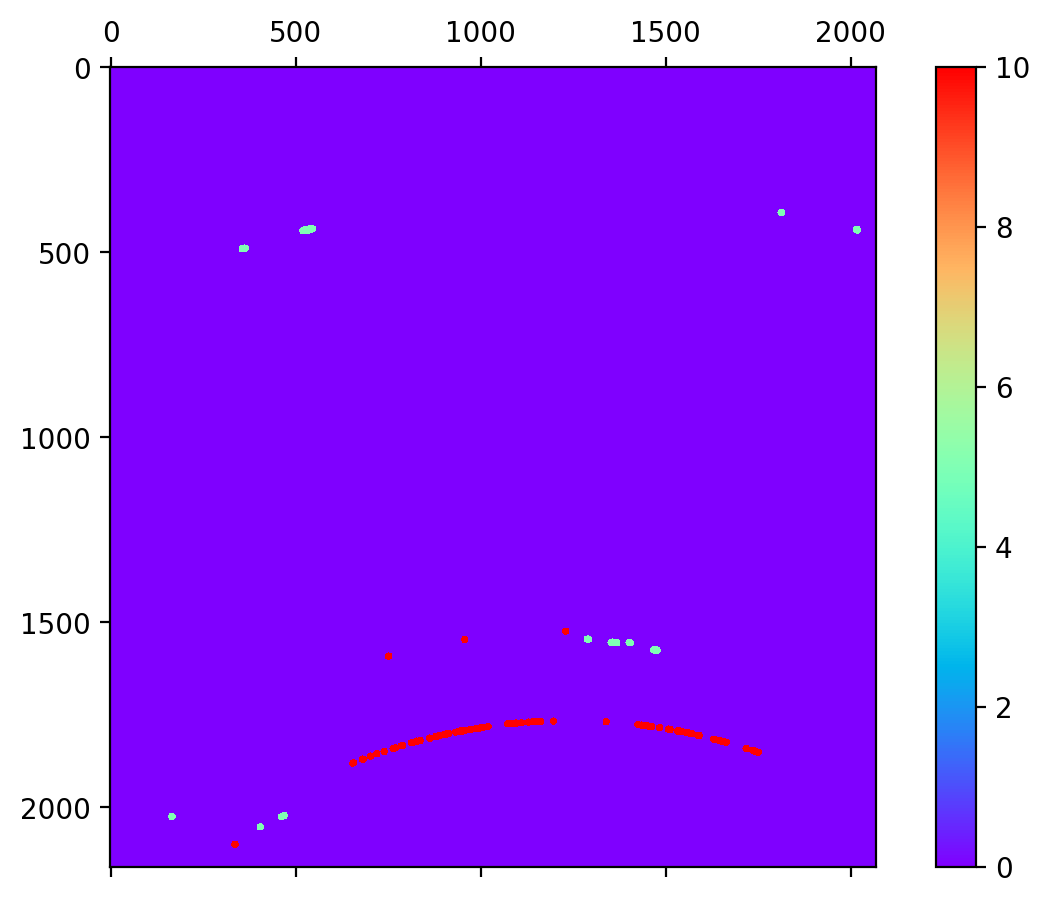

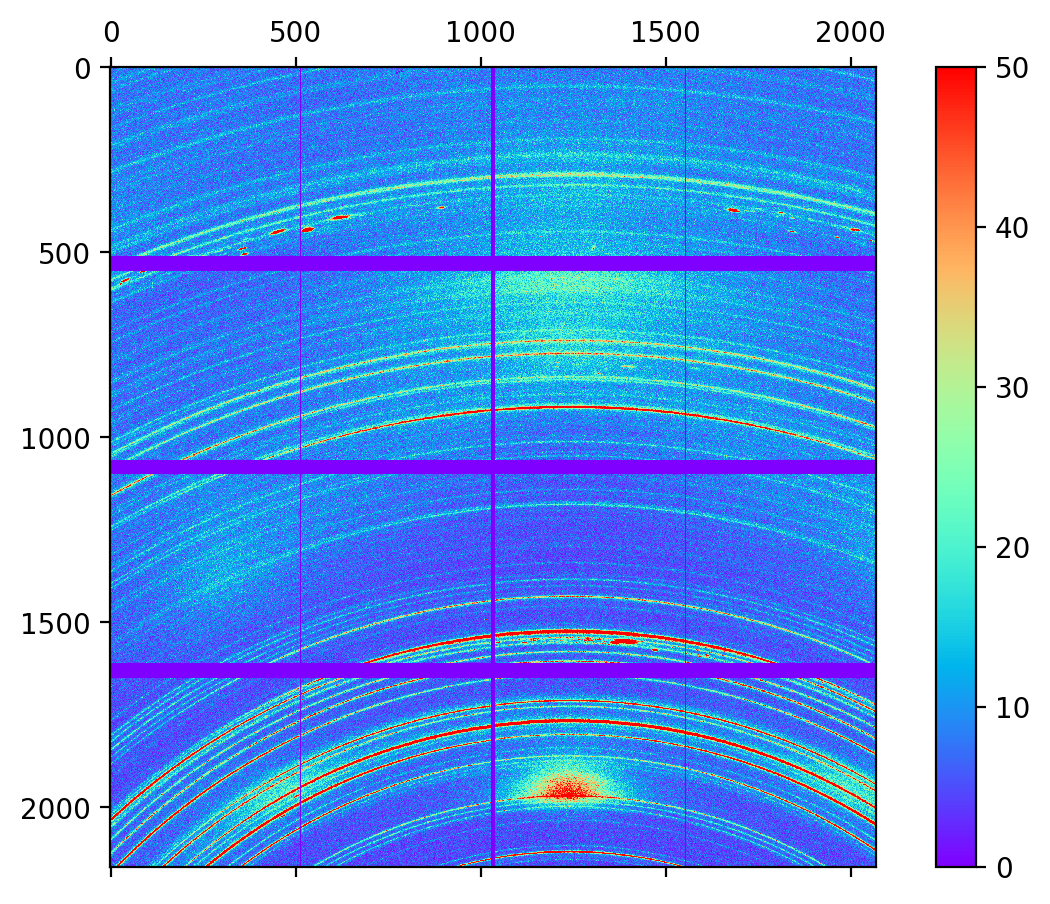

In [ ]:
submask, _ = create_mask(mask, matching_pos_list, value=-5,threshold=0.5)

ee.plot_img('_', '_', img_data=mask+submask, vmin=0, vmax=10, scale="normal", aspect="1")
ee.plot_img('_', '_', img_data=img_data_current_2, vmin=0.0, vmax=50.0, scale="normal", aspect="1")

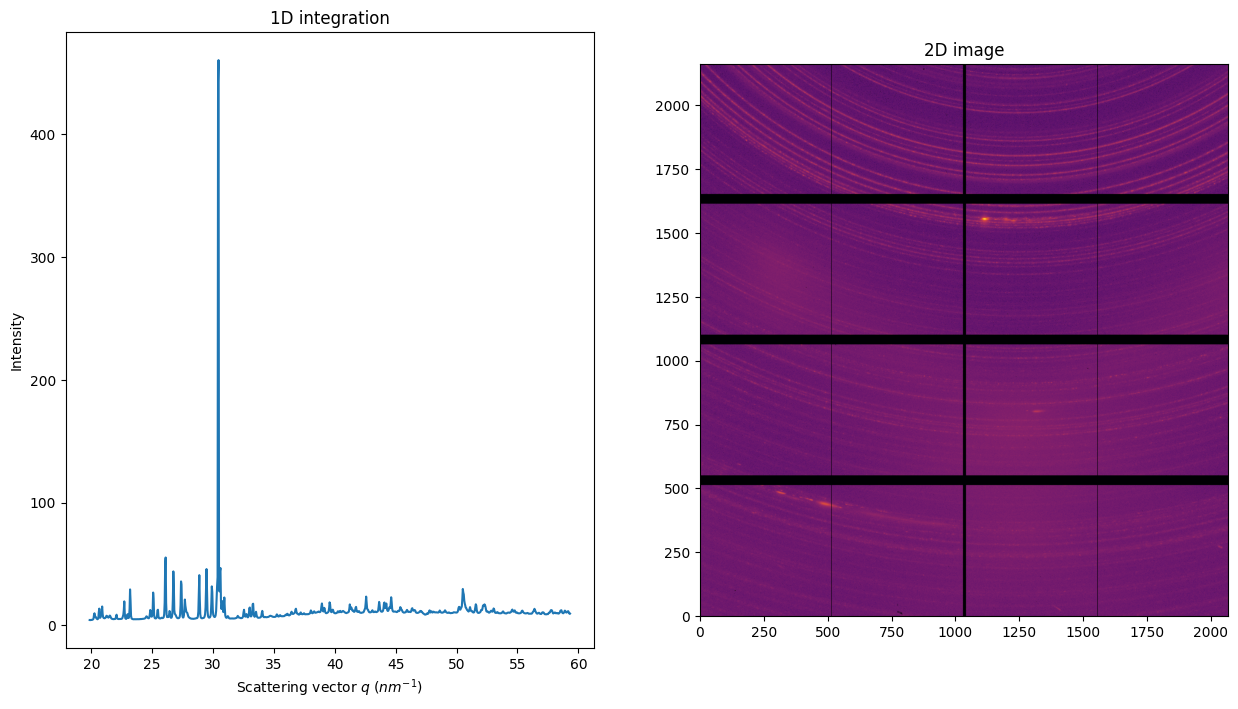

In [27]:
import os
os.environ["PYOPENCL_COMPILER_OUTPUT"]="0"

from matplotlib.pyplot import subplots
from pyFAI.gui import jupyter
import numpy, fabio, pyFAI
from pyFAI import benchmark
from pyFAI.test.utilstest import UtilsTest

ai = pyFAI.load("/Users/williamrigaut/Desktop/Notebooks/Extract_ESRF_Data/ESRF_data/CONFIG/LaB6_25keV_20250501.poni")
#img = fabio.open("/Users/williamrigaut/Desktop/Notebooks/Extract_ESRF_Data/ESRF_data/SAVED_DATA/CeCoX/CeCoZn_4_7/CeCoZn_4_7_117.img").data
img = fabio.open("/Users/williamrigaut/Desktop/Notebooks/Extract_ESRF_Data/ESRF_data/SAVED_DATA/NdXFeB-magnetron/NdCeFeB_2_7/NdCeFeB_2_7_117.img").data

fig, ax = subplots(1, 2)
fig.set_size_inches(15, 8)
jupyter.display(img, ax=ax[1])
plot1d = ai.integrate1d(img, 1000)
jupyter.plot1d(plot1d, ax=ax[0])
ax[1].set_title("2D image")
pass

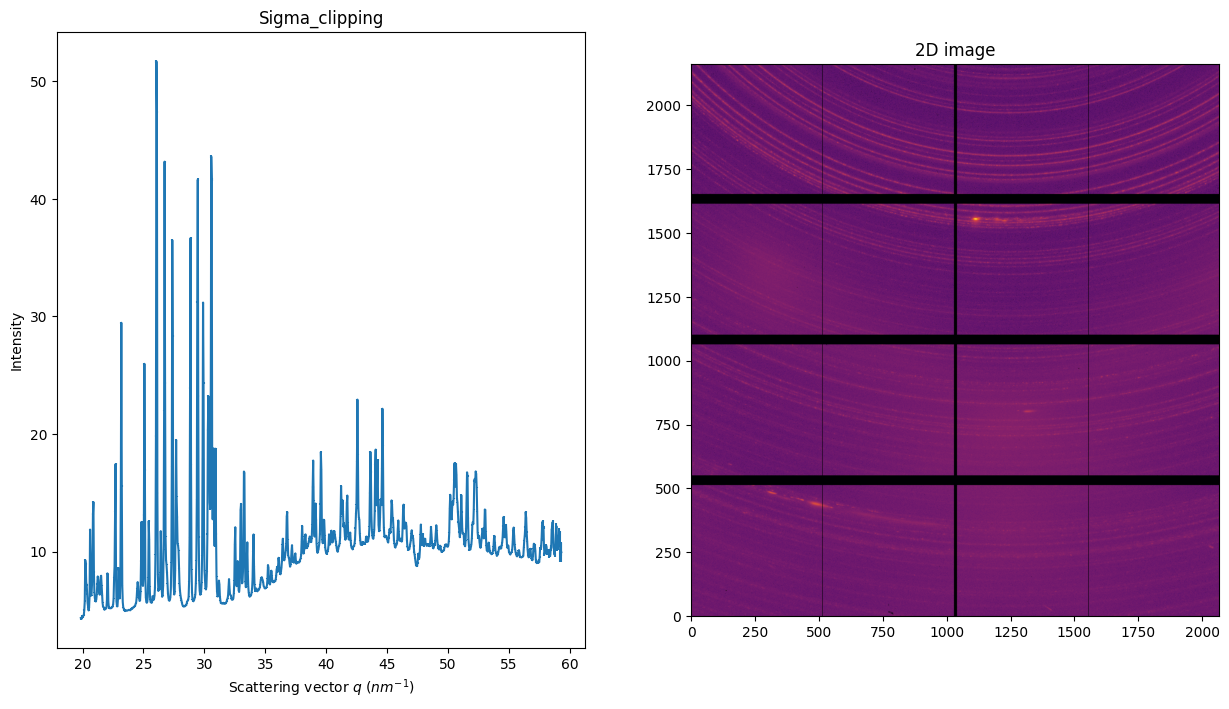

In [ ]:
fig, ax = subplots(1, 2)
fig.set_size_inches(15, 8)
jupyter.display(img, ax=ax[1])
plot1d_corrected_sigma = ai.sigma_clip(img, 1000, error_model="hybrid", method=("no", "csr", "cython"))
jupyter.plot1d(plot1d_corrected_sigma, ax=ax[0])
ax[1].set_title("2D image")
ax[0].set_title("Sigma_clipping")
pass

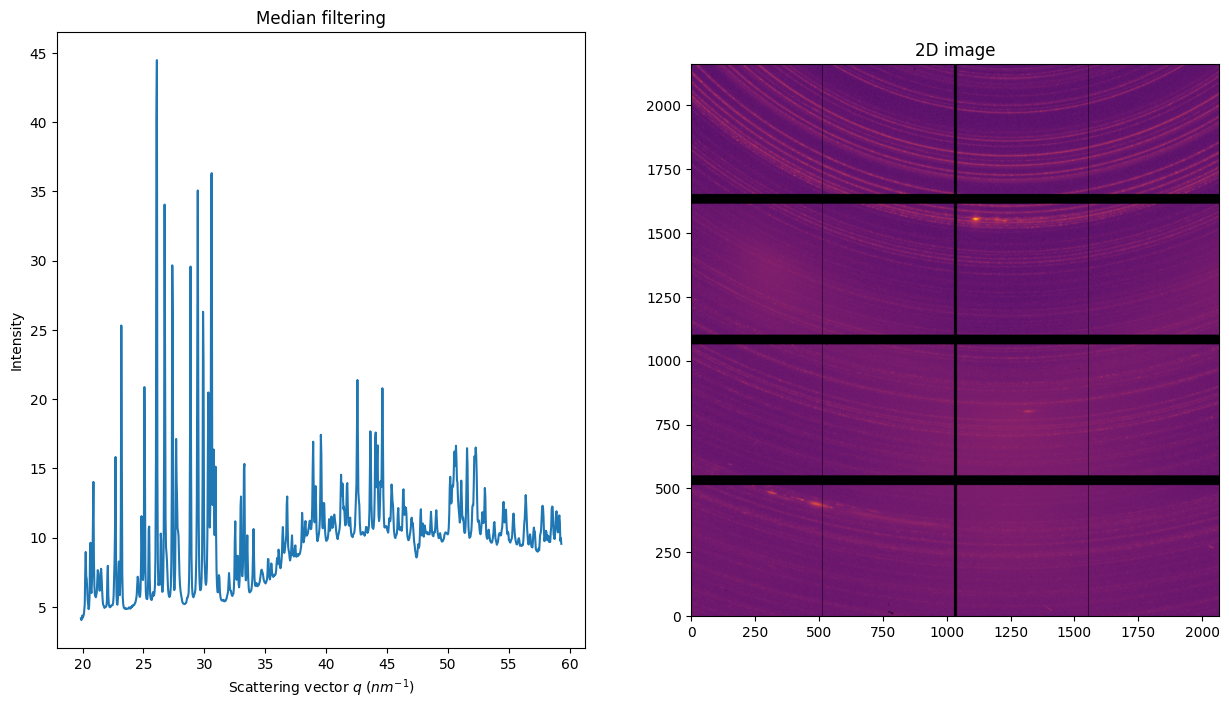

In [ ]:
method = ["full", "csr", "cython"]
percentile=(30,70)
pol=0.99
plot1d_corrected_median = ai.medfilt1d_ng(img, 1000, method=method, percentile=percentile, polarization_factor=pol)

fig, ax = subplots(1, 2)
fig.set_size_inches(15, 8)
jupyter.display(img, ax=ax[1])
jupyter.plot1d(plot1d_corrected_median, ax=ax[0])
ax[1].set_title("2D image")
ax[0].set_title("Median filtering")
pass